# Exploratory Data Analysis 

## Introduction

In this project, I will implement descriptive stastical analysis on car pricing. The skills that in invloving is showing below:

* df.describe to show the basic statistical information for each variables
* corr() to show the relationship between two variables and use regplot() to visualize the result
* boxplot() to visualize the distribution between different categories
* groupby() to group columns "drive-wheels", "body-style", and "price". Then use mean() to caculate the average price for a car with the certain type of drive-wheels and body style(ANOVA)
* pivot() to generate pivot tables for two variables
* pcolor() to draw a heat map


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [18]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

What is the data type of the peak-rpm?

In [19]:
df["peak-rpm"].dtypes

dtype('float64')

# Continous Numerical Variables

## 1. Caculate correlation between variables 

In [21]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## 2. Draw linear relationship betweens two variables

Positive relationship

(0.0, 56665.84793795601)

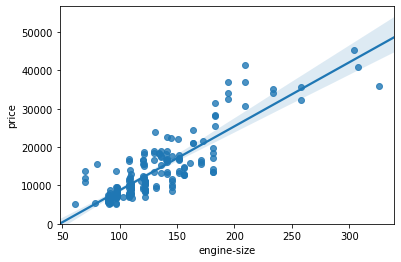

In [31]:
sns.regplot(x="engine-size", y="price", data=df) #seabborn to draw a scatter plot with a linear line
plt.ylim(0,) # set the lower limits of y axis

In [34]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Negative relationship

<Axes: xlabel='highway-mpg', ylabel='price'>

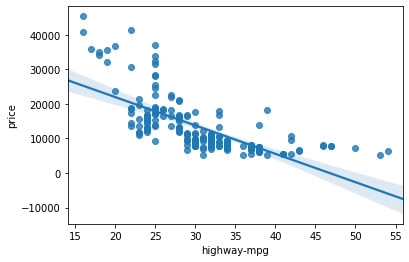

In [36]:
sns.regplot(x = "highway-mpg", y = "price", data = df)

In [37]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Weak relationship

<Axes: xlabel='peak-rpm', ylabel='price'>

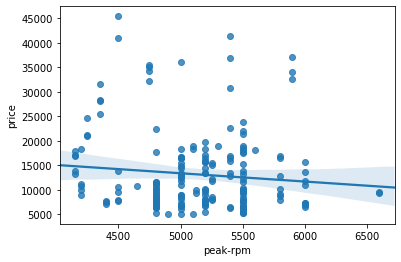

In [39]:
sns.regplot(x = "peak-rpm", y = "price", data = df)

In [40]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


# Categorical Variables

## 2. Boxplot to visualize the distribution of different category

<Axes: xlabel='body-style', ylabel='price'>

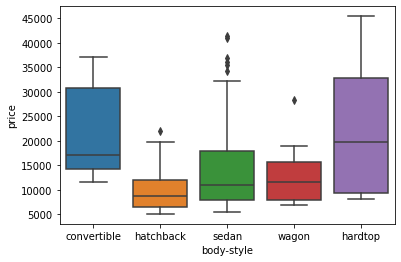

In [41]:
sns.boxplot(x = "body-style", y = "price", data = df)

We can see there is a significant overlap for price between different category of body style. Therefore, this variable might not be a good predictior of peice.

<Axes: xlabel='engine-location', ylabel='price'>

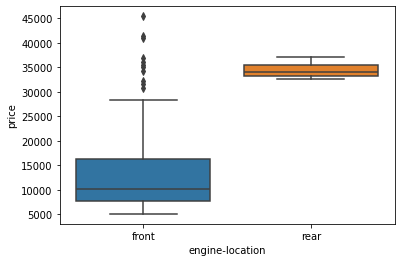

In [42]:
sns.boxplot(x = "engine-location", y = "price", data = df)

The distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

# Descriptive Stastica Analysis

In [46]:
df.describe() #But it will skip column with object data type

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [48]:
df.describe(include=['object']) # Display the statistical information for column with object data type

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value count

In [49]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [50]:
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [71]:
drive_wheels = df["drive-wheels"].value_counts().to_frame()
drive_wheels.reset_index(inplace=True)
drive_wheels = drive_wheels.rename(columns = {"drive-wheels" : "value counts"})
drive_wheels

,index,value counts
0,fwd,118
1,rwd,75
2,4wd,8


In [72]:
drive_wheels.index.name = 'drive-wheels'
drive_wheels

,index,value counts
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


## Basic Grouping

In [74]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [80]:
df_group = df[["drive-wheels", "body-style", "price"]]
df_grouped = df_group.groupby(["drive-wheels"], as_index = False).agg({"price":"mean"}) # as_index: do you want to set drive-wheels as the index of the new dataframe
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [81]:
df_group = df[["drive-wheels", "body-style", "price"]]
df_grouped = df_group.groupby(["drive-wheels"], as_index = False).mean() # mean() will skip non-numercal columns
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [83]:
df_group_wheels_body = df_group.groupby(["drive-wheels", "body-style"], as_index = False).agg({"price":"mean"})
df_group_wheels_body

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


pivot table: one variable along the rows while another one along the columns

In [85]:
group_pivot = df_group_wheels_body.pivot(index = "drive-wheels", columns ="body-style")
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

fill 0 for empty cell

In [86]:
group_pivot = group_pivot.fillna(0) #fill missing values with 0
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Find average price of each car baesd on the body style

In [88]:
group_body = df_group.groupby(["body-style"], as_index = False).mean()
group_body

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Heat map visualization

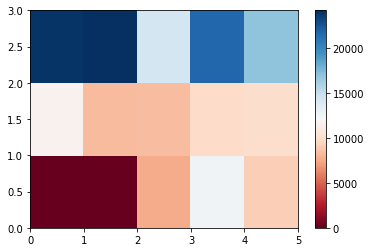

In [94]:
plt.pcolor(group_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

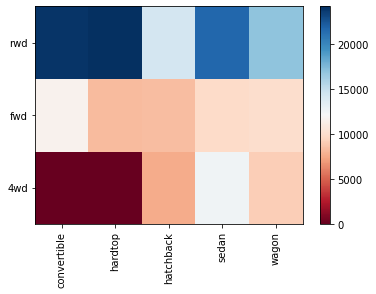

In [96]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [106]:
max_price = df_group_wheels_body.loc[df_group_wheels_body["price"].idxmax()]
print(max_price)

drive-wheels             rwd
body-style           hardtop
price           24202.714286
Name: 9, dtype: object


# Correlation & Causation

correlation coefficient and p value

calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'

In [107]:
from scipy import stats

In [113]:
pearson_coef, p = stats.pearsonr(df["wheel-base"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20
